###### The latest version of this IPython notebook is available at [http://github.com/jckantor](http://github.com/jckantor)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

Jeffrey C. Kantor (Kantor.1@nd.edu)

# Antoine Database

The purpose of this notebook is to demonstrate the use Antoine's equation for routine chemical calcualtions. The notebook uses Google Sheets as a data repository. You can run this notebook directly by (1) clicking on 

[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org/repo/jckantor/Antoine-Database)

or (2) by downloading and running on your own Jupyter/Python installation, or (3) by forking the [github repository](https://github.com/jckantor/Antoine-Database)

## Introduction to Antoine's Equation

In [229]:
from IPython.display import YouTubeVideo
YouTubeVideo('Adr9_2LnQdw') 

### Read Data Set

A data set of coefficients for Antoine's equation approximation for a selected set of compounds has been prepared as a [Google Sheet]().

In [228]:
import requests
from StringIO import StringIO
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheets/d/1lqIWdnmjiZX2LwHZ_5TdPXDOEn8hp-ZkdONlbjA-P1k/export?format=csv&id')
csv = pd.io.parsers.read_csv(StringIO(r.content))

idx = pd.MultiIndex.from_tuples(zip(csv['Species'],csv['Tmin'],csv['Tmax']),
                         names=['Species','Tmin','Tmax'])

adb = pd.DataFrame(index = idx)
adb['A'] = pd.Series(list(csv['A']),index = idx)
adb['B'] = pd.Series(list(csv['B']),index = idx)
adb['C'] = pd.Series(list(csv['C']),index = idx)

adb

A         B        C
Species      Tmin  Tmax                            
Acetaldehyde -45.0 70    8.00550  1600.000  291.800
Acetic Acid   16.7 320   7.38782  1533.313  222.309
Benzene       8.0  103   6.90565  1211.033  220.790
Toluene       6.0  137   6.95464  1344.800  218.480
Water         0.0  60    8.10765  1750.286  235.000
              60.0 150   7.96681  1668.210  228.000

### Saturation Pressure

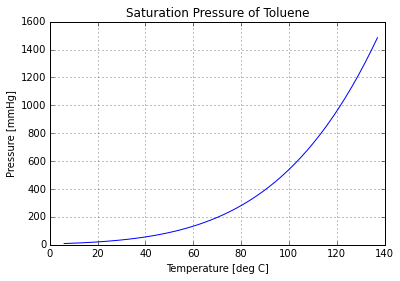

In [227]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def PsatPlot(species):
    for Tmin,Tmax in adb.ix[species].index:
        A = adb.ix[species,Tmin,Tmax]['A']
        B = adb.ix[species,Tmin,Tmax]['B']
        C = adb.ix[species,Tmin,Tmax]['C']
        f = lambda T: 10.0**(A - B/(T + C) )
        T = np.linspace(Tmin,Tmax)
        plt.plot(T,f(T),'b')
    plt.xlabel('Temperature [deg C]')
    plt.ylabel('Pressure [mmHg]')
    plt.title('Saturation Pressure of ' + species)
    plt.grid();

import ipywidgets as widgets
from IPython.display import display

widgets.interact(PsatPlot, species=list(adb.index.levels[0]));